# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import simulation

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
%%time
results = simulation.SimulationResult()
simulator = simulation.Simulator(results, waves = 1, bundles = 30000000, bundle_size = 1)

CPU times: user 113 µs, sys: 32 µs, total: 145 µs
Wall time: 147 µs


In [3]:
%%time
#simulator.run()
simulator.run_all_waves()

[555 555 555 ... 555 555 555]
10000000.0
[555 555 555 ... 555 555 555]
10000000.0
photon batch energy joules: 0.0001073754517379301
photon batch power watts: 0.10737545173793009
emitter area m^2: 1.0000001111620804e-06
batch radiosity w/m^2: 107375.43980185282
CPU times: user 5.99 s, sys: 46.7 ms, total: 6.04 s
Wall time: 6.04 s


LED emitted photons: 30000000


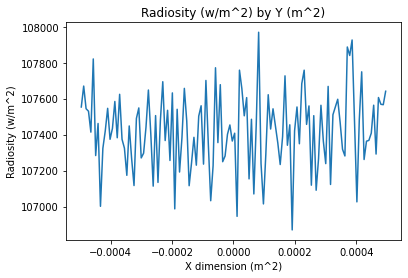

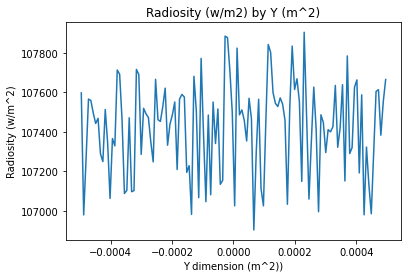

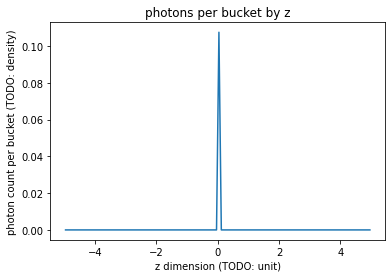

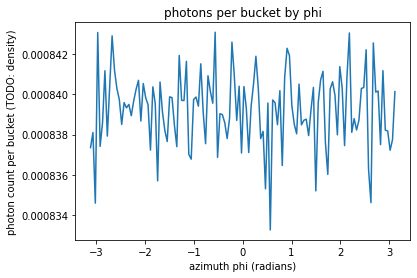

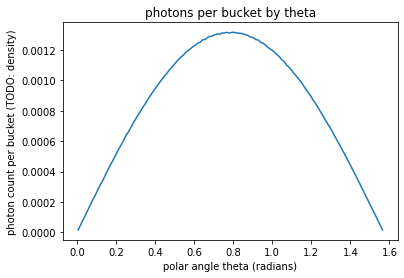

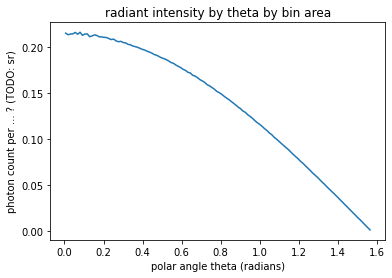

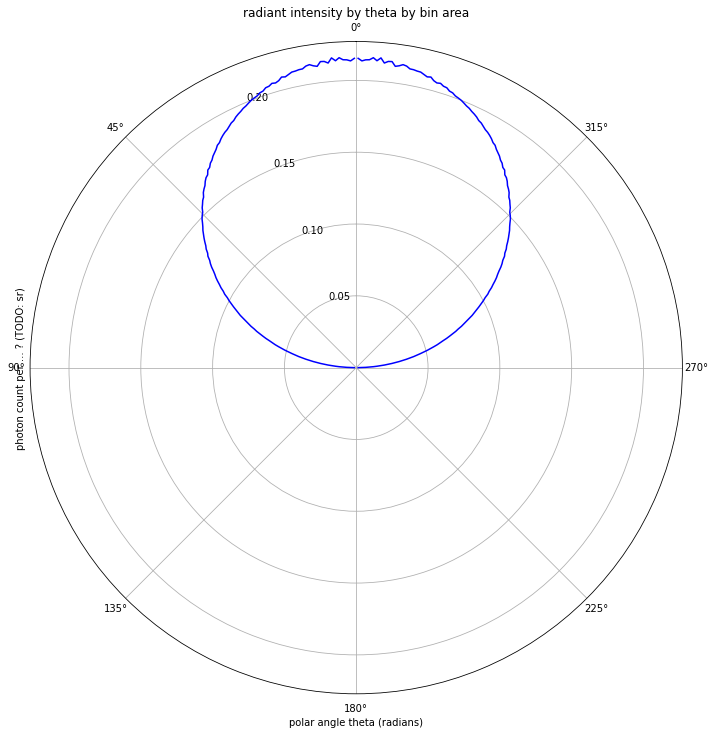

Output()

In [4]:
print(f"LED emitted photons: {results._source_stage._photons_size}")
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stage_3d(results._source_stage)

diffuser incident photons: 25350494


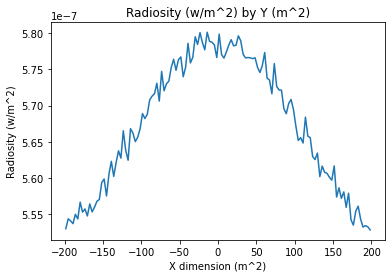

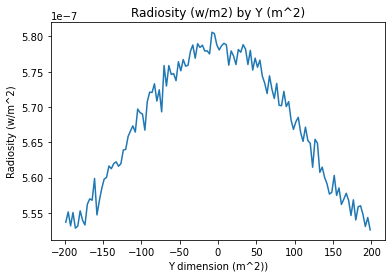

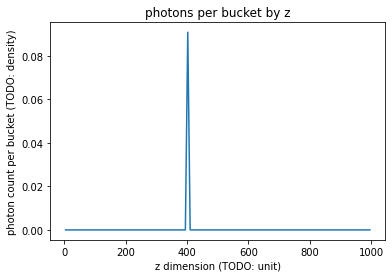

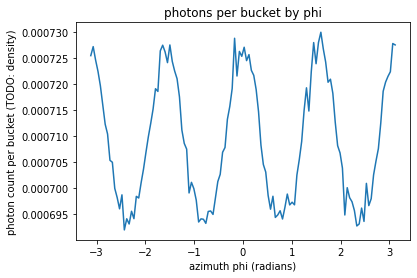

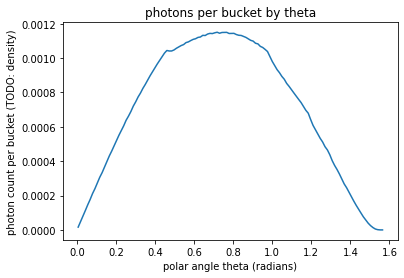

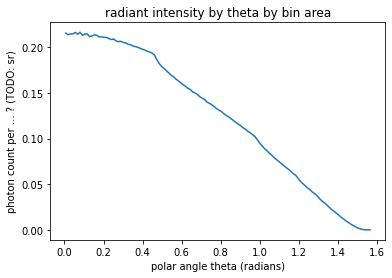

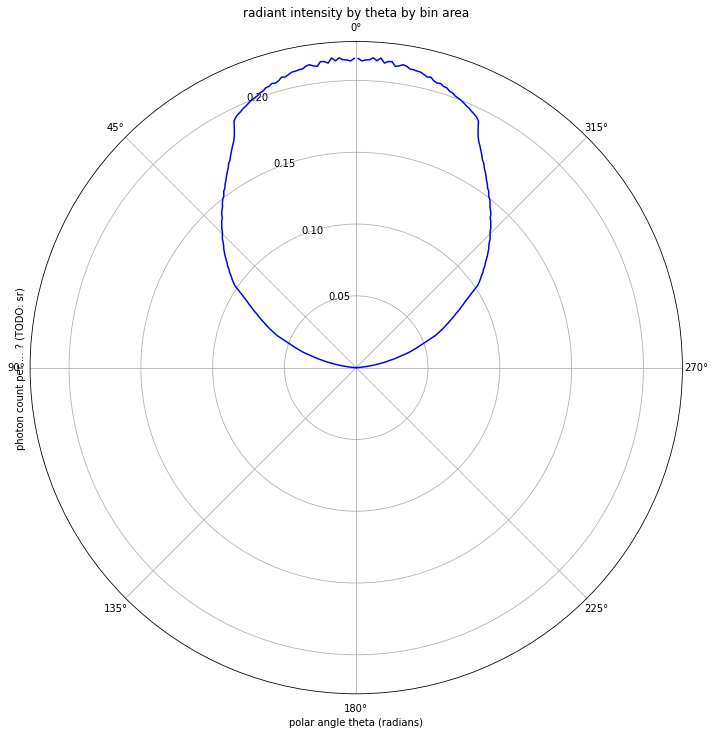

Output()

In [5]:
print(f"diffuser incident photons: {results._box_stage._photons_size}")
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stage_3d(results._box_stage)

diffuser scattered photons: 21293769


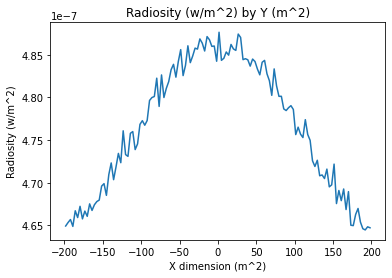

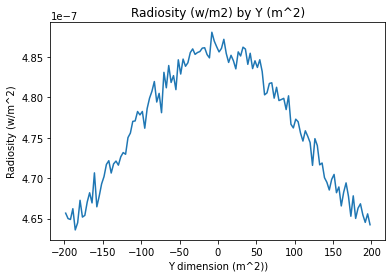

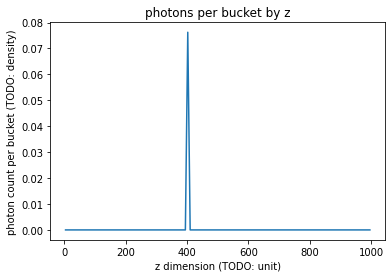

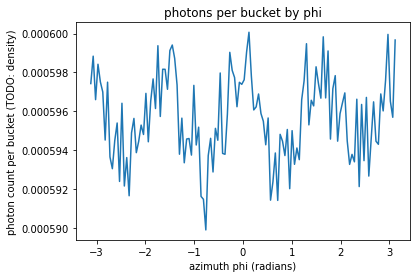

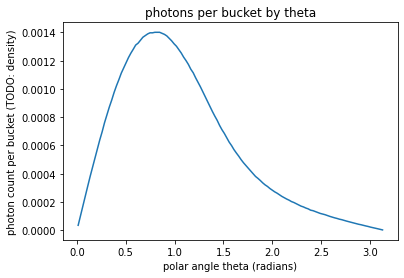

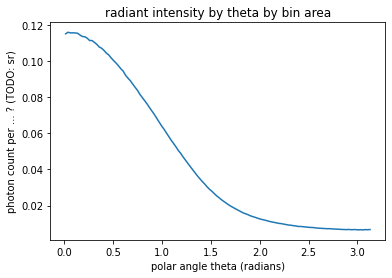

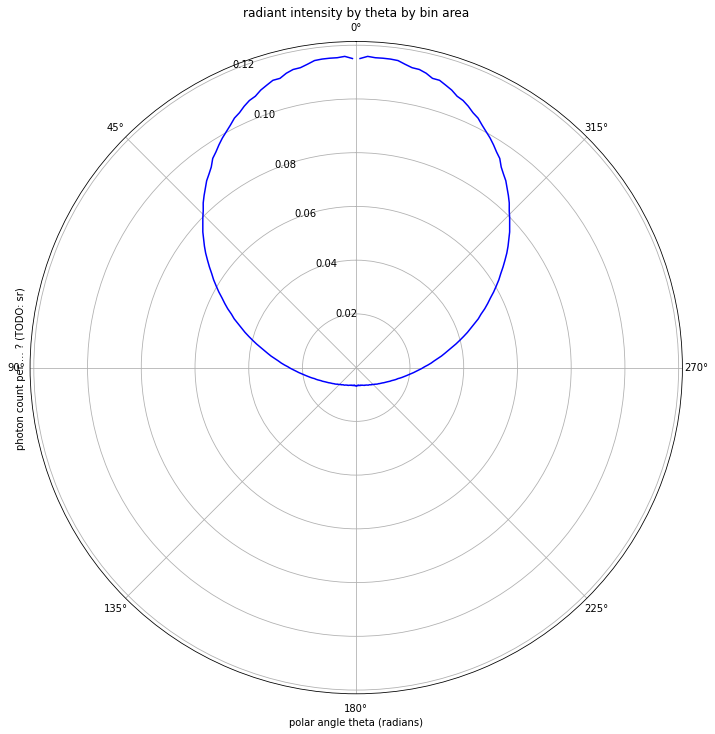

Output()

In [6]:
print(f"diffuser scattered photons: {results._diffuser_stage._photons_size}")
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stage_3d(results._diffuser_stage)

reflector indicent photons: 2075


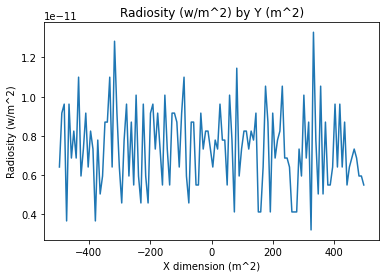

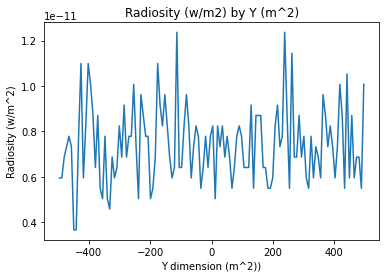

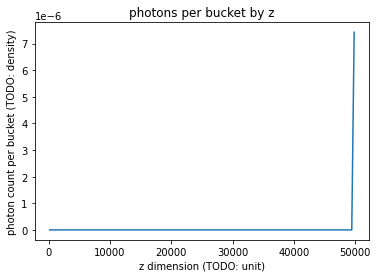

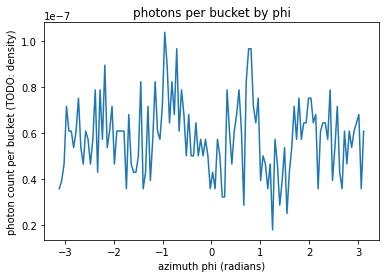

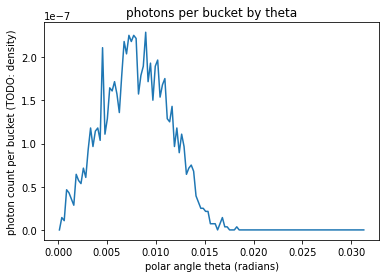

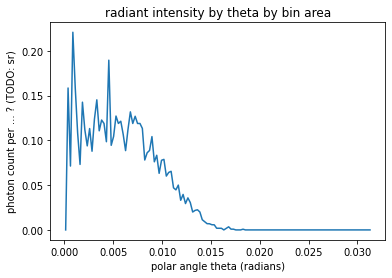

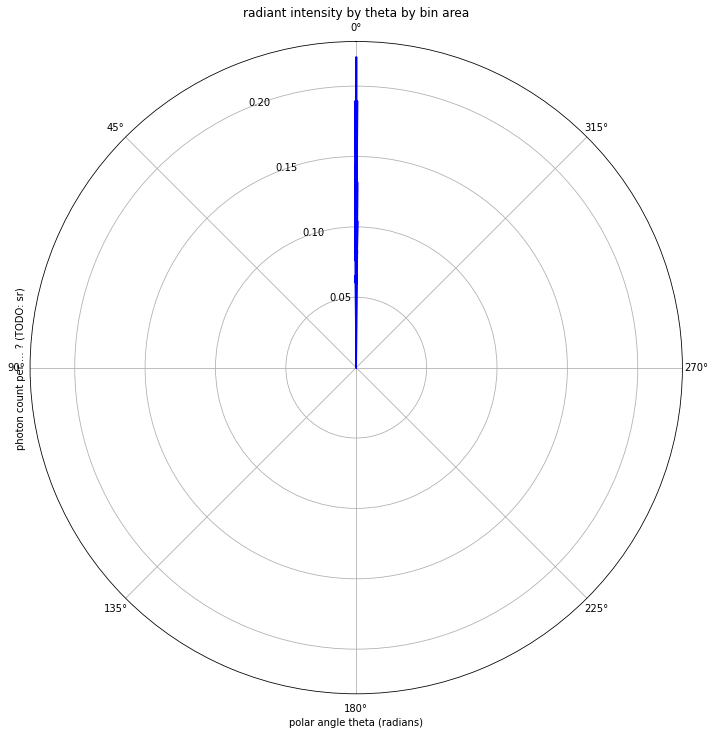

Output()

In [7]:
print(f"reflector indicent photons: {results._outbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stage_3d(results._outbound_stage)

reflected photons: 2075


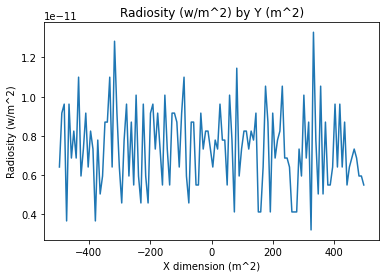

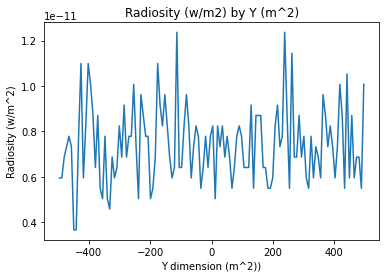

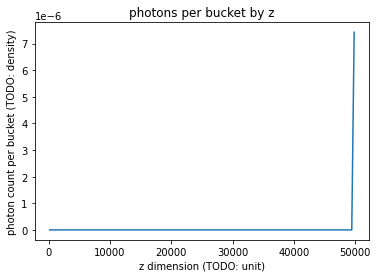

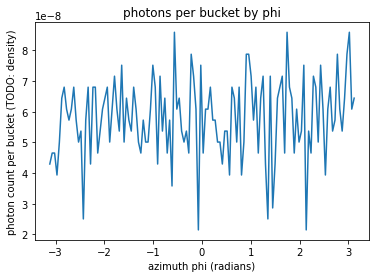

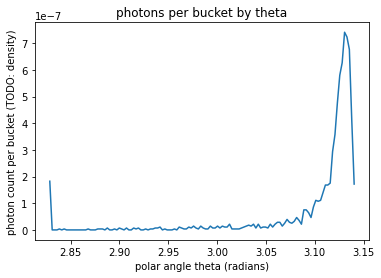

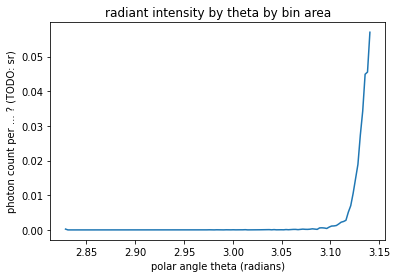

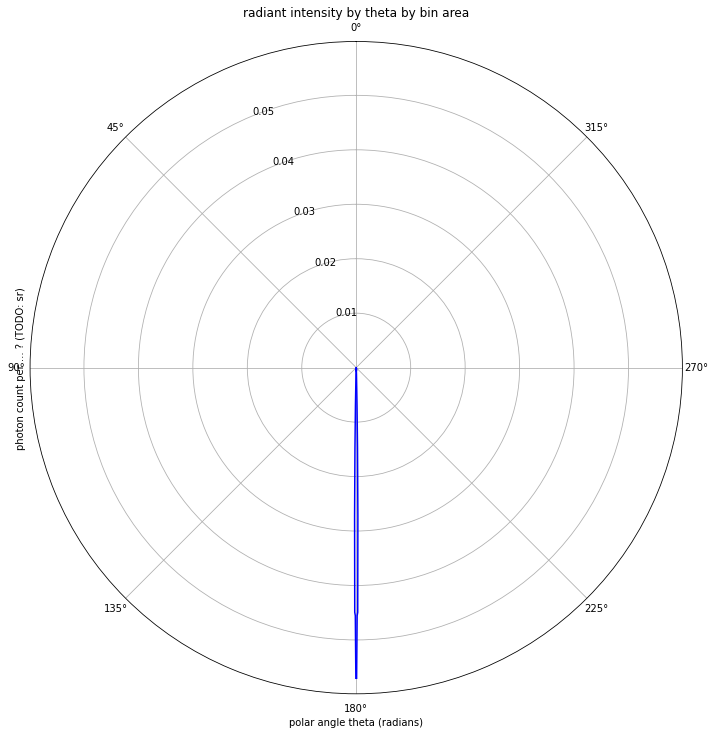

Output()

In [8]:
print(f"reflected photons: {results._inbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stage_3d(results._inbound_stage)

camera plane photons: 1396


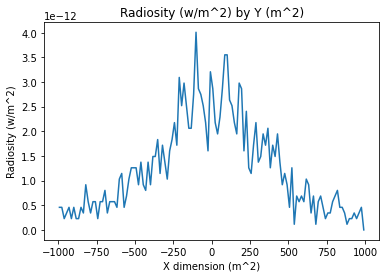

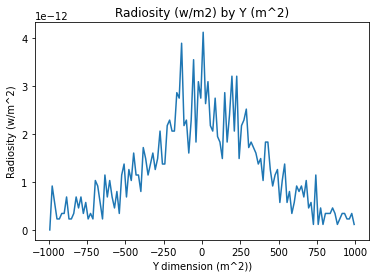

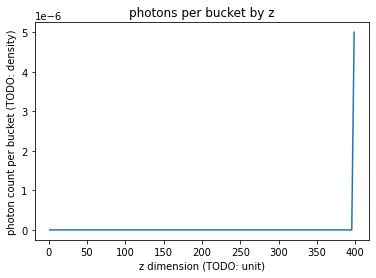

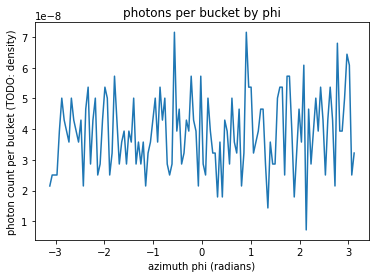

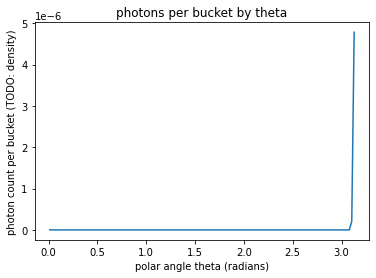

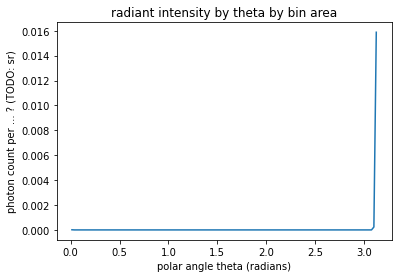

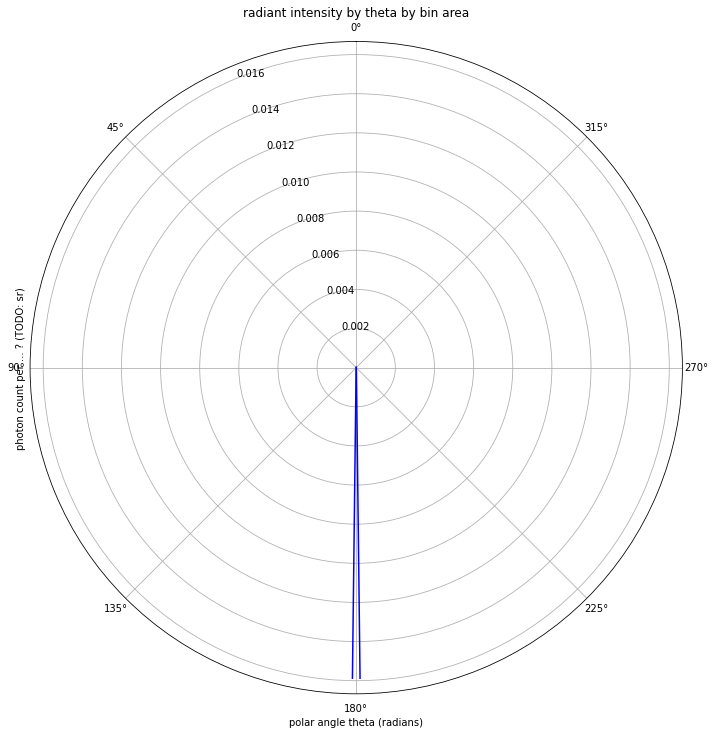

Output()

In [9]:
print(f"camera plane photons: {results._camera_plane_stage._photons_size}")
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stage_3d(results._camera_plane_stage)